In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn.linear_model as l

In [ ]:
def read_data(file_name):
    # Read the data with its path location
    try:
        data = pd.read_csv(file_name)
        return data
    except Exception:
        sys.exit(1)

In [ ]:
def trainValTestSplit(data):
    shuffled = data.sample(frac=1, random_state=0)
    dataSize = len(shuffled)
    train = shuffled[:int(dataSize * 0.7)]
    val = shuffled[int(dataSize * 0.7):int(dataSize * 0.8)]
    test = shuffled[int(dataSize * 0.8):]
    return train, val, test

In [ ]:
def normalize(X, min, max):
    X = (X - min) / (max - min)
    return X

In [ ]:
def get_data(file_location):
    data = read_data(file_location)

    train, val, test = trainValTestSplit(data)
    minVal = train.iloc[:, :-1].min()
    maxVal = train.iloc[:, :-1].max()

    X_train = np.array(normalize(train.iloc[:, :-1], minVal, maxVal))
    X_val = np.array(normalize(val.iloc[:, :-1], minVal, maxVal))
    X_test = np.array(normalize(test.iloc[:, :-1], minVal, maxVal))

    y_train = np.array(train.iloc[:, -1:])
    y_val = np.array(val.iloc[:, -1:])
    y_test = np.array(test.iloc[:, -1:])

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
absolutePath = r'C:\Users\gulce\Desktop\EEE 8TH SEMESTER\CS 464\Homeworks\HW2\dataset.csv'
# absolutePath = input('Enter the file location of the dataset: ')
X_train, X_val, X_test, y_train, y_val, y_test = get_data(absolutePath)

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_val.shape))
print("y_test shape: {}".format(y_test.shape))

In [64]:
clf = l.LogisticRegression()
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)

0.8150833333333334


C:\Users\gulce\anaconda3\envs\LogisticRegression\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [66]:
def gaussianInitialization(dimension):
    np.random.seed(2)
    p = np.random.normal(loc=0, scale=1, size=(dimension, 1))
    return p

In [67]:
def uniformInitialization(dimension):
    np.random.seed(2)
    p = np.random.uniform(size=(dimension, 1))
    return p

In [68]:
def zeroInitialization(dimension):
    p = np.zeros((dimension, 1))
    return p

In [69]:
def getAccuracy(y_true, y_pred):
    accuracyBool = (y_true.ravel() == y_pred.ravel())
    accuracy = np.count_nonzero(accuracyBool) / accuracyBool.shape[0]
    return accuracy

In [70]:
def getConfusionMatrix(y_true, y_pred):
    y_true = pd.Categorical(y_true)
    y_pred = pd.Categorical(y_pred)
    confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)
    print(confusion_matrix)
    plt.figure()
    sn.heatmap(confusion_matrix, cmap="Blues", annot=True)

In [71]:
def getValAccPlot(val_acc, paramaterName):
    title = 'Validation Accuracy For Every Epoch With Different ' + paramaterName
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.plot(val_acc)

In [72]:
class LogisticRegression:
    def __init__(self, epochs=100, learningRate=0.001, batchSize=64, initialization='gaussian'):
        self.epochs = epochs
        self.learningRate = learningRate
        self.batchSize = batchSize
        self.initialization = {'gaussian': lambda dimension: gaussianInitialization(dimension),
                               'uniform': lambda dimension: uniformInitialization(dimension),
                               'zero': lambda dimension: zeroInitialization(dimension)}[initialization]

    def fit(self, X_train, y_train):
        m = X_train.shape[0]
        w = self.initialization(X_train.shape[1])
        b = self.initialization(1)
        if m % self.batchSize == 0:
            iterationNo = m//self.batchSize
        else:
            iterationNo = m//self.batchSize+1
        val_acc = []
        for epoch in range(self.epochs):
            for batch in range(iterationNo):
                startIdx = batch*self.batchSize
                endIdx = startIdx+self.batchSize
                if batch == iterationNo-1:
                    prob = sigmoid(np.dot(X_train[startIdx:], w) + b)
                    dw = (1 / self.batchSize) * np.dot(X_train[startIdx:].T, (prob - y_train[startIdx:]))
                    db = (1 / self.batchSize) * np.sum(prob - y_train[startIdx:])
                else:
                    prob = sigmoid(np.dot(X_train[startIdx:endIdx], w) + b)
                    dw = (1 / self.batchSize) * np.dot(X_train[startIdx:endIdx].T, (prob - y_train[startIdx:endIdx]))
                    db = (1 / self.batchSize) * np.sum(prob - y_train[startIdx:endIdx])
                w -= self.learningRate * dw
                b -= self.learningRate * db
            y_pred = self.predict(w, b, X_val, 0.5)
            val_accuracy = getAccuracy(y_pred, y_val)
            val_acc.append(val_accuracy)
            print('-------------- Epoch', epoch, 'finished. Accuracy is', val_accuracy,'--------------')
        return w, b, val_acc

    def predict(self, w, b, X, threshold):
        y_pred = np.zeros(X.shape[0])
        prob = sigmoid(np.dot(X, w) + b)
        for i in range(prob.shape[0]):
            if prob[i,0] > threshold:
                y_pred[i] = 1
            else:
                y_pred[i] = 0
        return y_pred


Start training for batchsize = 42000 

-------------- Epoch 0 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 1 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 2 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 3 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 4 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 5 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 6 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 7 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 8 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 9 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 10 finished. Accuracy is 0.6283333333333333 --------------
-------------- Epoch 11 finished. Accuracy is 0.6281666666666667 --------------
----------

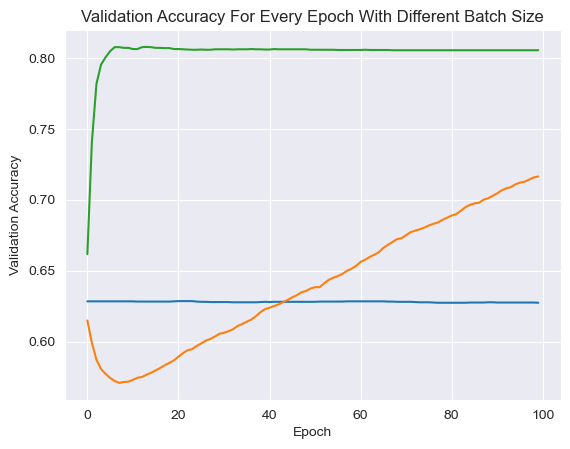

In [73]:
batchSize = [42000, 64, 1]
batchSizeAcc = []
for size in batchSize:
    print('\nStart training for batchsize =', size, '\n')
    model = LogisticRegression(epochs=100, learningRate=0.001, batchSize=size, initialization='gaussian')
    w, b, val_acc = model.fit(X_train, y_train)
    getValAccPlot(val_acc, 'Batch Size')
    y_pred = model.predict(w, b, X_val, 0.5)
    accuracy = getAccuracy(y_pred, y_val)
    batchSizeAcc.append(accuracy)
    print('\nFinal accuracy for batchsize =', size, 'is:', accuracy)
plt.show()


Start training for gaussian initialization

-------------- Epoch 0 finished. Accuracy is 0.6148333333333333 --------------
-------------- Epoch 1 finished. Accuracy is 0.599 --------------
-------------- Epoch 2 finished. Accuracy is 0.5871666666666666 --------------
-------------- Epoch 3 finished. Accuracy is 0.5806666666666667 --------------
-------------- Epoch 4 finished. Accuracy is 0.5771666666666667 --------------
-------------- Epoch 5 finished. Accuracy is 0.5743333333333334 --------------
-------------- Epoch 6 finished. Accuracy is 0.5721666666666667 --------------
-------------- Epoch 7 finished. Accuracy is 0.5708333333333333 --------------
-------------- Epoch 8 finished. Accuracy is 0.5715 --------------
-------------- Epoch 9 finished. Accuracy is 0.5716666666666667 --------------
-------------- Epoch 10 finished. Accuracy is 0.573 --------------
-------------- Epoch 11 finished. Accuracy is 0.5745 --------------
-------------- Epoch 12 finished. Accuracy is 0.575 ---

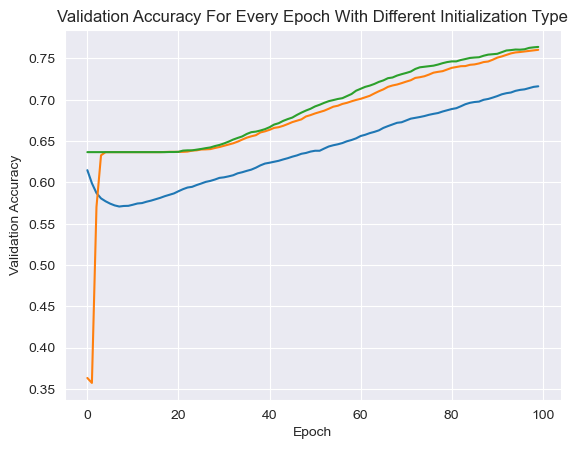

In [74]:
initializationType = ['gaussian', 'uniform', 'zero']
initializationAcc = []
for type in initializationType:
    print('\nStart training for', type, 'initialization\n')
    model = LogisticRegression(epochs=100, learningRate=0.001, batchSize=64, initialization=type)
    w, b, val_acc = model.fit(X_train, y_train)
    getValAccPlot(val_acc, 'Initialization Type')
    y_pred = model.predict(w, b, X_val, 0.5)
    accuracy = getAccuracy(y_pred, y_val)
    initializationAcc.append(accuracy)
    print('\nFinal accuracy for for', type, 'initialization is:', accuracy)
plt.show()


Start training for learning rate = 0.001 

-------------- Epoch 0 finished. Accuracy is 0.6148333333333333 --------------
-------------- Epoch 1 finished. Accuracy is 0.599 --------------
-------------- Epoch 2 finished. Accuracy is 0.5871666666666666 --------------
-------------- Epoch 3 finished. Accuracy is 0.5806666666666667 --------------
-------------- Epoch 4 finished. Accuracy is 0.5771666666666667 --------------
-------------- Epoch 5 finished. Accuracy is 0.5743333333333334 --------------
-------------- Epoch 6 finished. Accuracy is 0.5721666666666667 --------------
-------------- Epoch 7 finished. Accuracy is 0.5708333333333333 --------------
-------------- Epoch 8 finished. Accuracy is 0.5715 --------------
-------------- Epoch 9 finished. Accuracy is 0.5716666666666667 --------------
-------------- Epoch 10 finished. Accuracy is 0.573 --------------
-------------- Epoch 11 finished. Accuracy is 0.5745 --------------
-------------- Epoch 12 finished. Accuracy is 0.575 ----

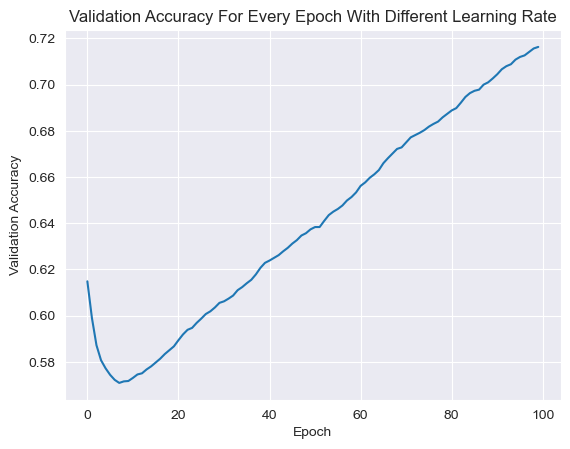

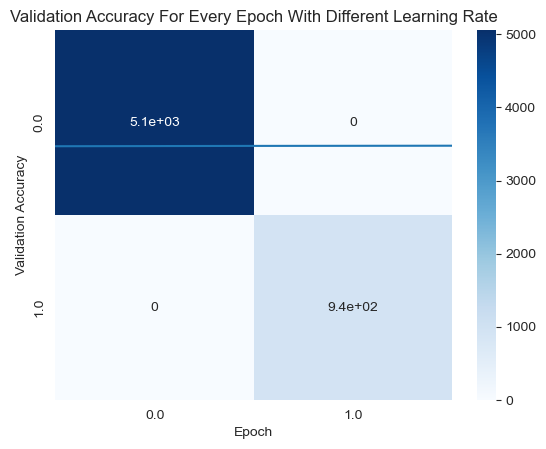

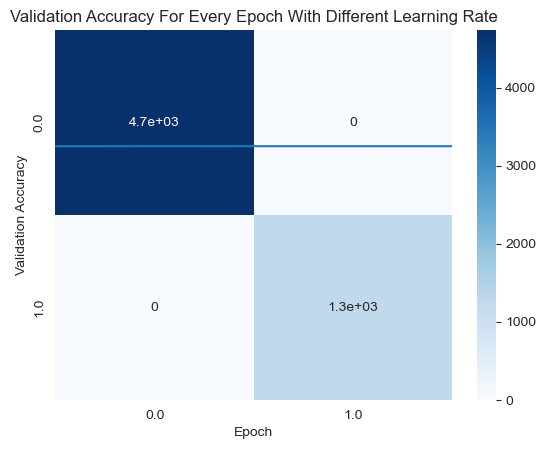

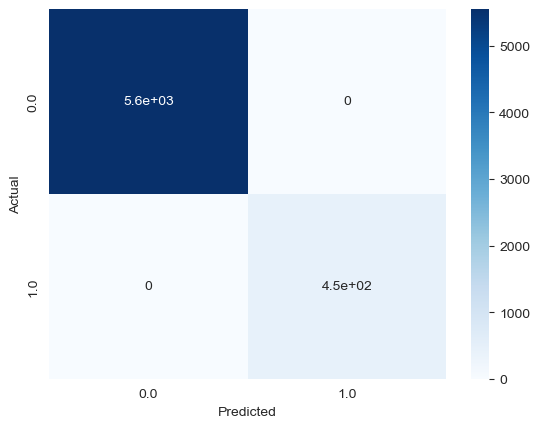

In [79]:
learningRate = [0.001, 0.0001, 0.00001]
learningRateAcc = []
for rate in learningRate:
    print('\nStart training for learning rate =', rate, '\n')
    model = LogisticRegression(epochs=100, learningRate=rate, batchSize=64, initialization='gaussian')
    w, b, val_acc = model.fit(X_train, y_train)
    getValAccPlot(val_acc, 'Learning Rate')
    y_pred = model.predict(w, b, X_val, 0.5)
    accuracy = getAccuracy(y_pred, y_val)
    learningRateAcc.append(accuracy)
    print('\nFinal accuracy for learning rate =', rate, 'is:', accuracy)
    getConfusionMatrix(y_pred, y_pred)
plt.show()


In [76]:
maxBatchSize = batchSize[np.argmax(batchSizeAcc)]
print(batchSizeAcc)
print(maxBatchSize)

[0.6273333333333333, 0.7163333333333334, 0.8053333333333333]
1


In [77]:
maxInitialization = initializationType[np.argmax(initializationAcc)]
print(initializationAcc)
print(maxInitialization)

[0.7163333333333334, 0.7605, 0.764]
zero


In [78]:
maxLearningRate = learningRate[np.argmax(learningRateAcc)]
print(learningRateAcc)
print(maxLearningRate)

[0.7163333333333334, 0.5725, 0.6146666666666667]
0.001
